In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# Load csv data
data = pd.read_csv('clusters.csv')
data.head()

,A,B,C
0,-0.087492,0.398000,0.014275
1,-1.071705,-0.546473,0.072424
2,2.747075,2.012649,3.083964
3,3.217913,2.213772,4.260312
4,-0.607273,0.793914,-0.516091


In [8]:
# Using PCA to create 2D visualization
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA

# Normalize the numeric features so they're on 
scaled_features = MinMaxScaler().fit_transform(data)
 
# Get two principal components, Feature Extraction
pca = PCA(n_components=2).fit(scaled_features) 
features_2d = pca.transform(scaled_features) 
features_2d[0:10] 

array([[ 0.38631524, -0.05515159],
       [ 0.5679739 , -0.06144958],
       [-0.2979762 ,  0.08474023],
       [-0.46052216,  0.11460533],
       [ 0.44134723, -0.16034683],
       [ 0.42096717, -0.06126763],
       [-0.57863184,  0.07164111],
       [-0.14035181,  0.10637315],
       [ 0.47575131,  0.13633551],
       [ 0.57024335,  0.0206122 ]])

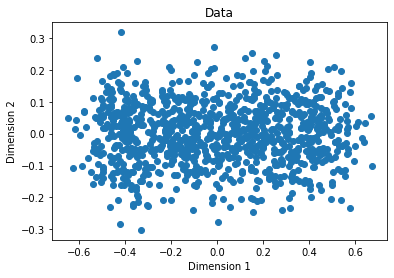

In [11]:
# Visualize the unclustered data points

%matplotlib inline

plt.scatter(features_2d[:,0], features_2d[:,1])
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.title('Data')
plt.show()